In [2]:
# Imports & Load Data

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# cleaned dataset from 01_data_setup_exploration
DATA_PATH = Path("../data/processed/cleaned_checkin_data.csv")
df = pd.read_csv(DATA_PATH)

print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,Timestamp,Column 2,Full name,Please enter the date today,Win,Loss,Blocker,Anything else you would like to share or ask,Win_clean,Loss_clean,Blocker_clean
0,2025-07-09 14:34:49,NaN,Student 1,2025-07-09 00:00:00,Completing my first week with Umuzi gave me co...,I didn’t get opportunities from two companies ...,Being financially unstable has been draining m...,I appreciate Umuzi for this opportunity to sho...,complete first give confidence sense purpose e...,get opportunity two company interview month di...,financially unstable drain energy focus day se...
1,2025-07-09 14:43:15,NaN,Student 2,2025-07-09 00:00:00,I enjoyed introspecting myself on the basis of...,Except for being sick and experiencing challen...,"None, only temporary set backs (reception and ...",Nothing for now.,enjoy introspect basis building prototype live...,except sick experiencing challenge reception n...,temporary set back reception etc
2,2025-07-09 14:49:40,NaN,Student 3,2025-07-09 00:00:00,Submitting all my work in time and completing ...,I don’t have any,"Data , I couldn’t join some meetings because I...",No thank you,submit work time complete course,NaN,datum join meeting datum
3,2025-07-09 14:50:41,NaN,Student 4,2025-07-09 00:00:00,I submitted most of the assigned assignments,I did not understand some assignments s well a...,Spending most time in class leading to having ...,"In overall, I am doing well and trying to do a...",submit assign assignment,understand assignment feel like lot work atten...,spend time lead little time understand execute...
4,2025-07-09 15:14:46,NaN,Student 5,2025-07-09 00:00:00,I enjoyed the Life Lifeline activity. I got to...,NaN,"I forgot to login to Google classroom, until I...",No.,enjoy life lifeline activity get dig deep ask ...,NaN,forget login google classroom receive email na...


In [5]:
import nltk
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Sentiment Analysis with TextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd

def get_sentiment(text):
    """Returns polarity score: -1 (negative) to +1 (positive)"""
    if pd.isna(text) or text.strip() == "":
        return 0
    return TextBlob(str(text)).sentiment.polarity

print("Calculating sentiment scores...")

# sentiment scoring
df['Win_sentiment'] = df['Win'].apply(get_sentiment)
df['Loss_sentiment'] = df['Loss'].apply(get_sentiment)
df['Blocker_sentiment'] = df['Blocker'].apply(get_sentiment)

print("Sentiment analysis complete!\n")

# distribution
print("="*60)
print("SENTIMENT SCORE SUMMARY")
print("="*60)
print(df[['Win_sentiment', 'Loss_sentiment', 'Blocker_sentiment']].describe())

# examples
print("\n" + "="*60)
print("SAMPLE SENTIMENT SCORES")
print("="*60)
print("\nMost Positive Win:")
most_positive_win = df.loc[df['Win_sentiment'].idxmax(), 'Win']
print(f"Score: {df['Win_sentiment'].max():.3f}")
print(f"Text: {most_positive_win[:150]}...")

print("\nMost Negative Loss:")
most_negative_loss = df.loc[df['Loss_sentiment'].idxmin(), 'Loss']
print(f"Score: {df['Loss_sentiment'].min():.3f}")
print(f"Text: {most_negative_loss[:150]}...")

Calculating sentiment scores...
Sentiment analysis complete!

SENTIMENT SCORE SUMMARY
       Win_sentiment  Loss_sentiment  Blocker_sentiment
count     372.000000      372.000000         372.000000
mean        0.214195        0.034958          -0.006203
std         0.232572        0.233468           0.197745
min        -0.700000       -0.812143          -1.000000
25%         0.000000        0.000000           0.000000
50%         0.200000        0.000000           0.000000
75%         0.400000        0.088542           0.000000
max         0.900000        1.000000           0.800000

SAMPLE SENTIMENT SCORES

Most Positive Win:
Score: 0.900
Text: MUB group project, wonderful connections and great team work...

Most Negative Loss:
Score: -0.812
Text: Fell sick, had a very bad flu and that challenged my participation and submitting work on time...


Sentiment distribution chart saved to: ../reports/charts/sentiment_distribution.png


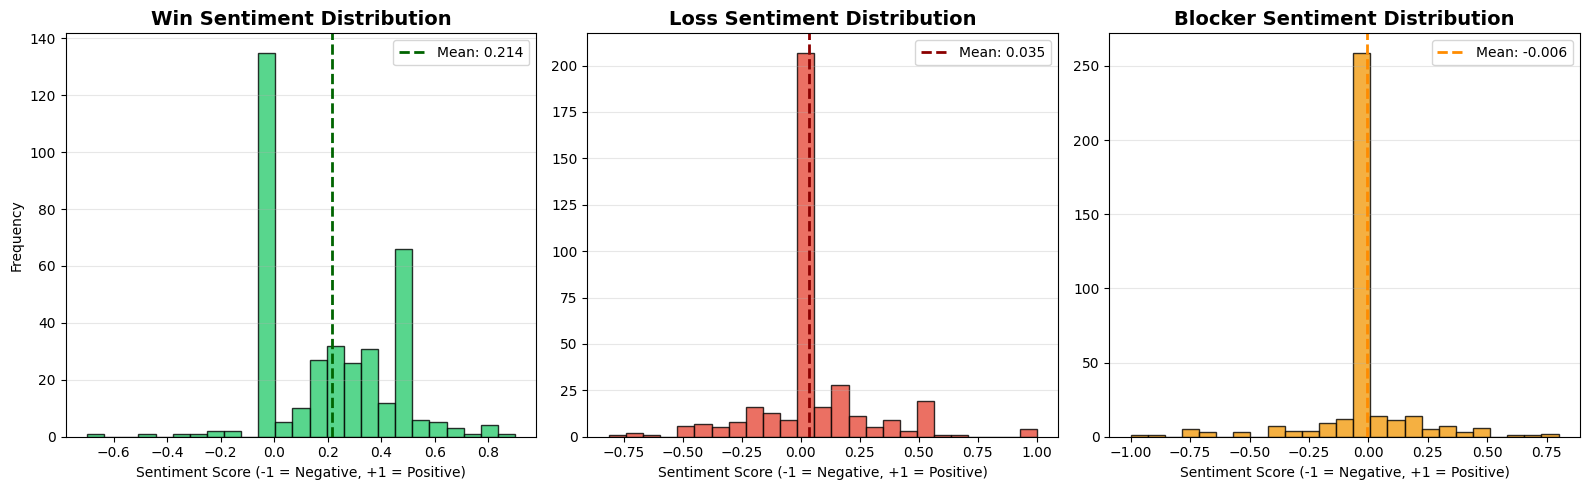


SENTIMENT INSIGHTS

 --> Win Responses:
   • Average Sentiment: 0.214 (0 = Neutral, +1 = Positive)
   • Most Positive: 0.900
   • Most Negative: -0.700

 --> Loss Responses:
   • Average Sentiment: 0.035
   • Most Positive: 1.000
   • Most Negative: -0.812

 --> Blocker Responses:
   • Average Sentiment: -0.006
   • Most Positive: 0.800
   • Most Negative: -1.000


In [10]:
# Sentiment Distribution Visualizations
import matplotlib.pyplot as plt
from pathlib import Path

# checking if charts directory exists
charts_dir = Path("../reports/charts")
charts_dir.mkdir(parents=True, exist_ok=True)

# figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Win sentiment
axes[0].hist(df['Win_sentiment'].dropna(), bins=25, color='#2ecc71', alpha=0.8, edgecolor='black')
axes[0].axvline(df['Win_sentiment'].mean(), color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {df["Win_sentiment"].mean():.3f}')
axes[0].set_title('Win Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment Score (-1 = Negative, +1 = Positive)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Loss sentiment
axes[1].hist(df['Loss_sentiment'].dropna(), bins=25, color='#e74c3c', alpha=0.8, edgecolor='black')
axes[1].axvline(df['Loss_sentiment'].mean(), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {df["Loss_sentiment"].mean():.3f}')
axes[1].set_title('Loss Sentiment Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment Score (-1 = Negative, +1 = Positive)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Blocker sentiment
axes[2].hist(df['Blocker_sentiment'].dropna(), bins=25, color='#f39c12', alpha=0.8, edgecolor='black')
axes[2].axvline(df['Blocker_sentiment'].mean(), color='darkorange', linestyle='--', linewidth=2, label=f'Mean: {df["Blocker_sentiment"].mean():.3f}')
axes[2].set_title('Blocker Sentiment Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Sentiment Score (-1 = Negative, +1 = Positive)')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/charts/sentiment_distribution.png', dpi=300, bbox_inches='tight')
print("Sentiment distribution chart saved to: ../reports/charts/sentiment_distribution.png")
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SENTIMENT INSIGHTS")
print("="*60)
print(f"\n --> Win Responses:")
print(f"   • Average Sentiment: {df['Win_sentiment'].mean():.3f} (0 = Neutral, +1 = Positive)")
print(f"   • Most Positive: {df['Win_sentiment'].max():.3f}")
print(f"   • Most Negative: {df['Win_sentiment'].min():.3f}")

print(f"\n --> Loss Responses:")
print(f"   • Average Sentiment: {df['Loss_sentiment'].mean():.3f}")
print(f"   • Most Positive: {df['Loss_sentiment'].max():.3f}")
print(f"   • Most Negative: {df['Loss_sentiment'].min():.3f}")

print(f"\n --> Blocker Responses:")
print(f"   • Average Sentiment: {df['Blocker_sentiment'].mean():.3f}")
print(f"   • Most Positive: {df['Blocker_sentiment'].max():.3f}")
print(f"   • Most Negative: {df['Blocker_sentiment'].min():.3f}")

Generating word clouds...

 --> Word cloud saved: ../reports/charts/wordcloud_wins.png


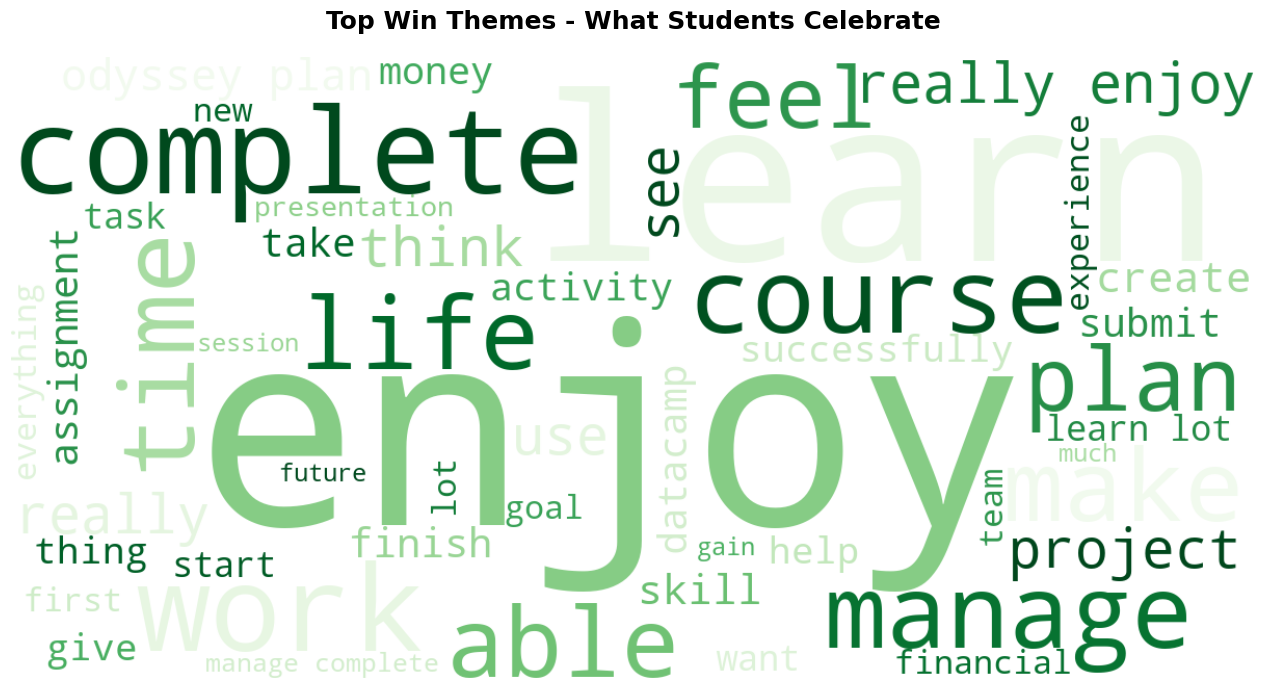

 --> Word cloud saved: ../reports/charts/wordcloud_losses.png


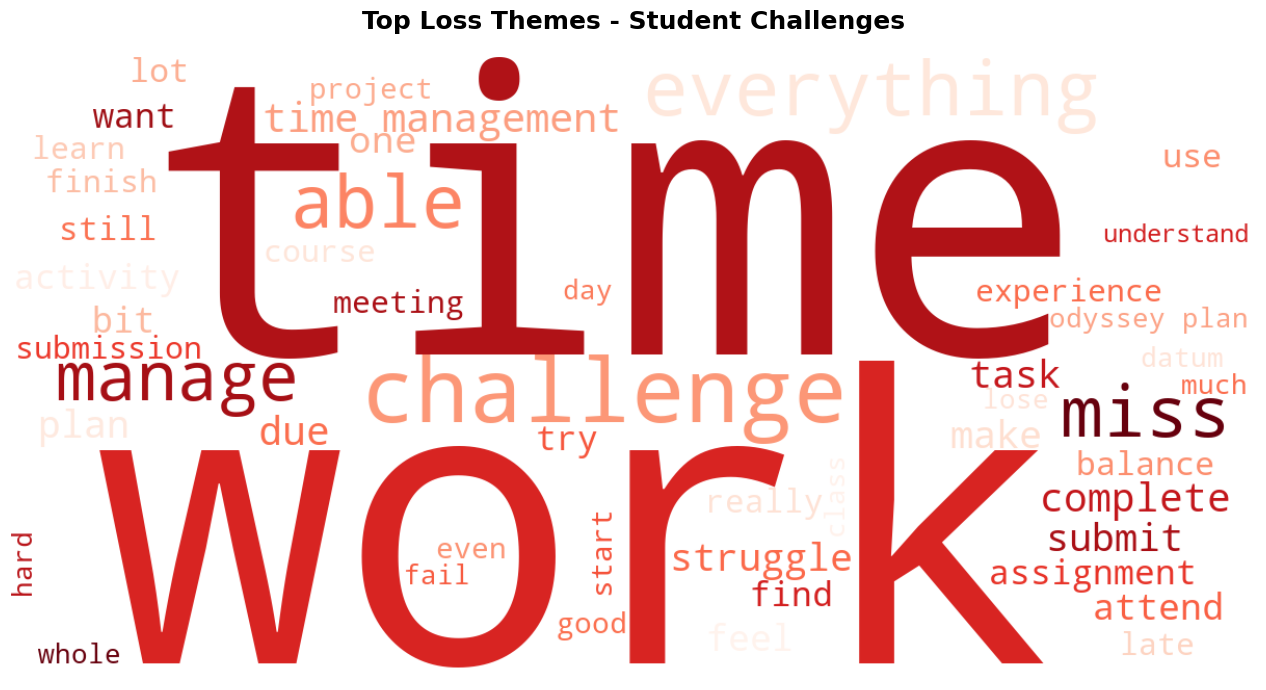

 --> Word cloud saved: ../reports/charts/wordcloud_blockers.png


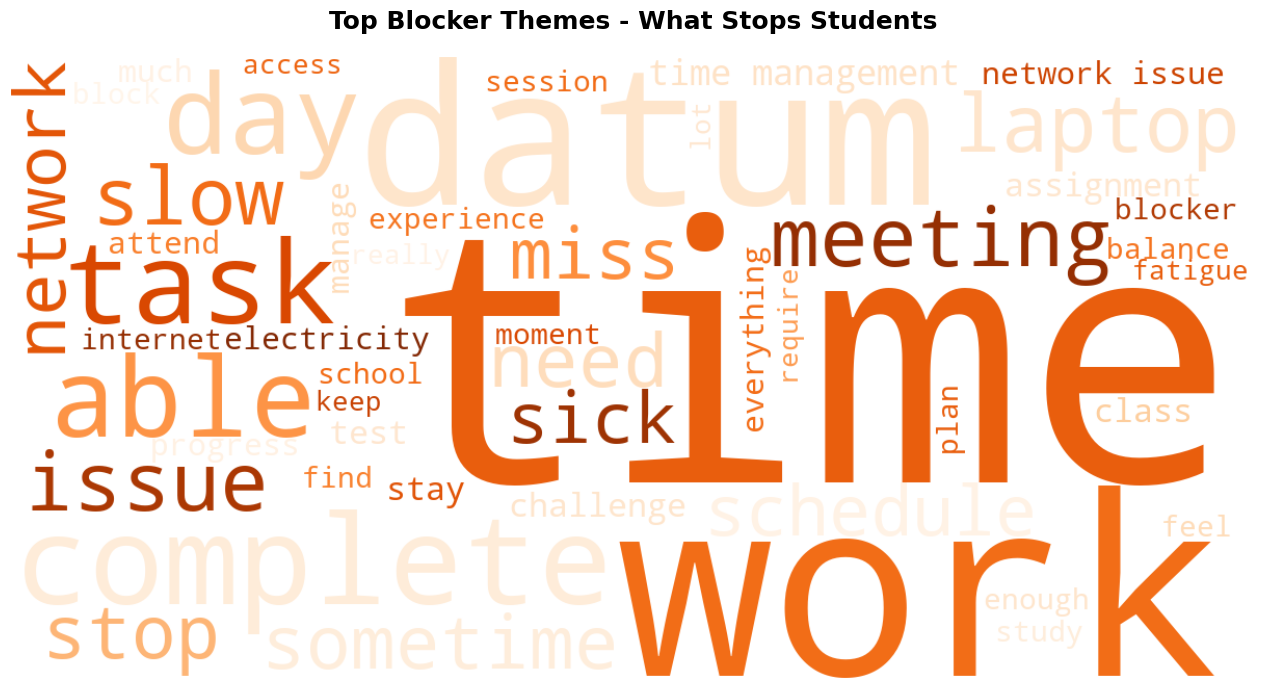


 -->All word clouds generated successfully!


In [12]:
# Word Cloud Visualizations
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pathlib import Path

def create_wordcloud(text_series, title, colormap='viridis', filename=None):
    """Generate and save word cloud from text series"""
    # Combining all the text
    text = " ".join(text_series.dropna().astype(str))
    
    if not text.strip():
        print(f" !! No text data for {title}")
        return
    
    # Generating word cloud
    wordcloud = WordCloud(
        width=1200, 
        height=600,
        background_color='white',
        colormap=colormap,
        max_words=50,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(text)
    
    # Creating figure
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.tight_layout()
    
    # Save 
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
        print(f" --> Word cloud saved: {filename}")
    
    plt.show()

print("Generating word clouds...\n")

# Creating word clouds for each category
create_wordcloud(
    df['Win_clean'], 
    'Top Win Themes - What Students Celebrate', 
    colormap='Greens',
    filename='../reports/charts/wordcloud_wins.png'
)

create_wordcloud(
    df['Loss_clean'], 
    'Top Loss Themes - Student Challenges', 
    colormap='Reds',
    filename='../reports/charts/wordcloud_losses.png'
)

create_wordcloud(
    df['Blocker_clean'], 
    'Top Blocker Themes - What Stops Students', 
    colormap='Oranges',
    filename='../reports/charts/wordcloud_blockers.png'
)

print("\n -->All word clouds generated successfully!")

In [13]:
# Topic Summary Tables with Frequency Analysis
from collections import Counter
import pandas as pd

def get_top_themes(text_series, n=5):
    """Extract top N themes from token frequency"""
    # All tokens
    tokens = " ".join(text_series.dropna().astype(str)).split()
    
    # Count frequency
    top_tokens = Counter(tokens).most_common(n)
    
    # Structured data
    return pd.DataFrame([
        {"Rank": i+1, "Theme": token.upper(), "Frequency": count, "Percentage": f"{(count/len(tokens)*100):.1f}%"} 
        for i, (token, count) in enumerate(top_tokens)
    ])

print("="*70)
print("TOP 5 THEMES BY CATEGORY")
print("="*70)

# Win themes
print("\n TOP 5 WIN THEMES (What Students Celebrate)")
print("-"*70)
win_themes = get_top_themes(df['Win_clean'], 5)
display(win_themes)

# Loss themes
print("\n TOP 5 LOSS THEMES (Student Challenges)")
print("-"*70)
loss_themes = get_top_themes(df['Loss_clean'], 5)
display(loss_themes)

# Blocker themes
print("\n TOP 5 BLOCKER THEMES (What Stops Students)")
print("-"*70)
blocker_themes = get_top_themes(df['Blocker_clean'], 5)
display(blocker_themes)

# Save to CSV for reporting/Looker
print("\n" + "="*70)
print("EXPORTING DATA FOR REPORTS")
print("="*70)

win_themes.to_csv('../reports/top_win_themes.csv', index=False)
print("--> Saved: ../reports/top_win_themes.csv")

loss_themes.to_csv('../reports/top_loss_themes.csv', index=False)
print("--> Saved: ../reports/top_loss_themes.csv")

blocker_themes.to_csv('../reports/top_blocker_themes.csv', index=False)
print("--> Saved: ../reports/top_blocker_themes.csv")


df.to_csv('../data/processed/checkin_data_with_sentiment.csv', index=False)
print(" --> Saved: ../data/processed/checkin_data_with_sentiment.csv")

TOP 5 THEMES BY CATEGORY

 TOP 5 WIN THEMES (What Students Celebrate)
----------------------------------------------------------------------


,Rank,Theme,Frequency,Percentage
0,1,ENJOY,97,3.3%
1,2,LEARN,62,2.1%
2,3,COMPLETE,52,1.8%
3,4,MANAGE,46,1.6%
4,5,COURSE,45,1.5%



 TOP 5 LOSS THEMES (Student Challenges)
----------------------------------------------------------------------


,Rank,Theme,Frequency,Percentage
0,1,TIME,64,2.9%
1,2,WORK,46,2.1%
2,3,CHALLENGE,39,1.8%
3,4,GET,33,1.5%
4,5,PLAN,25,1.1%



 TOP 5 BLOCKER THEMES (What Stops Students)
----------------------------------------------------------------------


,Rank,Theme,Frequency,Percentage
0,1,TIME,53,3.3%
1,2,WORK,36,2.2%
2,3,ISSUE,21,1.3%
3,4,DATUM,20,1.2%
4,5,NETWORK,18,1.1%



EXPORTING DATA FOR REPORTS
--> Saved: ../reports/top_win_themes.csv
--> Saved: ../reports/top_loss_themes.csv
--> Saved: ../reports/top_blocker_themes.csv
 --> Saved: ../data/processed/checkin_data_with_sentiment.csv


In [14]:
# Executive Summary Report
import pandas as pd

print("="*70)
print("EXECUTIVE SUMMARY - STUDENT CHECK-IN ANALYSIS")
print("="*70)

print(f"\n --> DATASET OVERVIEW")
print(f"{'─'*70}")
print(f"   Total Responses:          {len(df):,}")
print(f"   Win Responses:            {df['Win'].notna().sum():,} ({df['Win'].notna().sum()/len(df)*100:.1f}%)")
print(f"   Loss Responses:           {df['Loss'].notna().sum():,} ({df['Loss'].notna().sum()/len(df)*100:.1f}%)")
print(f"   Blocker Responses:        {df['Blocker'].notna().sum():,} ({df['Blocker'].notna().sum()/len(df)*100:.1f}%)")

print(f"\n --> TOP 5 WINS (What Students Celebrate):")
print(f"{'─'*70}")
for i, row in win_themes.iterrows():
    print(f"   {row['Rank']}. {row['Theme']} - {row['Frequency']} mentions ({row['Percentage']})")

print(f"\n --> TOP 5 LOSSES (Student Challenges):")
print(f"{'─'*70}")
for i, row in loss_themes.iterrows():
    print(f"   {row['Rank']}. {row['Theme']} - {row['Frequency']} mentions ({row['Percentage']})")

print(f"\n --> TOP 5 BLOCKERS (What Stops Students):")
print(f"{'─'*70}")
for i, row in blocker_themes.iterrows():
    print(f"   {row['Rank']}. {row['Theme']} - {row['Frequency']} mentions ({row['Percentage']})")

print(f"\n --> SENTIMENT ANALYSIS INSIGHTS:")
print(f"{'─'*70}")
print(f"   Win Sentiment (Avg):      {df['Win_sentiment'].mean():.3f} ({'Positive' if df['Win_sentiment'].mean() > 0 else 'Neutral'})")
print(f"   Loss Sentiment (Avg):     {df['Loss_sentiment'].mean():.3f} ({'Negative' if df['Loss_sentiment'].mean() < 0 else 'Neutral'})")
print(f"   Blocker Sentiment (Avg):  {df['Blocker_sentiment'].mean():.3f} ({'Negative' if df['Blocker_sentiment'].mean() < 0 else 'Neutral'})")

print("\n" + "="*70)
print(" --> KEY RECOMMENDATIONS FOR PROGRAM MANAGEMENT")
print("="*70)

recommendations = [
    ("1. INFRASTRUCTURE SUPPORT", 
     "Address connectivity issues (network, data, electricity) affecting 60+ students",
     "→ Action: Provide data stipends, backup power solutions, network troubleshooting guides"),
    
    ("2. TIME MANAGEMENT TRAINING", 
     "32+ students struggle with time management and balancing responsibilities",
     "→ Action: Offer productivity workshops, scheduling tools, time blocking techniques"),
    
    ("3. MENTAL HEALTH & WELLNESS", 
     "27+ students report fatigue, burnout, or illness affecting participation",
     "→ Action: Implement wellness check-ins, flexible deadlines during illness, mental health resources"),
    
    ("4. PLATFORM ACCESS RESOLUTION", 
     "10+ students unable to access Financial Foundations course",
     "→ Action: Immediate tech support to resolve course access issues"),
    
    ("5. CELEBRATE LEARNING WINS", 
     "High engagement with DataCamp, Coursera, Customer Centricity courses",
     "→ Action: Recognize completions publicly, create peer learning sessions, share success stories")
]

for title, issue, action in recommendations:
    print(f"\n{title}")
    print(f"   Issue: {issue}")
    print(f"   {action}")

print("\n" + "="*70)
print(" --> Analysis Complete - Data Ready for Presentation")
print("="*70)

EXECUTIVE SUMMARY - STUDENT CHECK-IN ANALYSIS

 --> DATASET OVERVIEW
──────────────────────────────────────────────────────────────────────
   Total Responses:          372
   Win Responses:            360 (96.8%)
   Loss Responses:           303 (81.5%)
   Blocker Responses:        277 (74.5%)

 --> TOP 5 WINS (What Students Celebrate):
──────────────────────────────────────────────────────────────────────
   1. ENJOY - 97 mentions (3.3%)
   2. LEARN - 62 mentions (2.1%)
   3. COMPLETE - 52 mentions (1.8%)
   4. MANAGE - 46 mentions (1.6%)
   5. COURSE - 45 mentions (1.5%)

 --> TOP 5 LOSSES (Student Challenges):
──────────────────────────────────────────────────────────────────────
   1. TIME - 64 mentions (2.9%)
   2. WORK - 46 mentions (2.1%)
   3. CHALLENGE - 39 mentions (1.8%)
   4. GET - 33 mentions (1.5%)
   5. PLAN - 25 mentions (1.1%)

 --> TOP 5 BLOCKERS (What Stops Students):
──────────────────────────────────────────────────────────────────────
   1. TIME - 53 mentions (3.

 Saved: ../reports/charts/response_rates.png


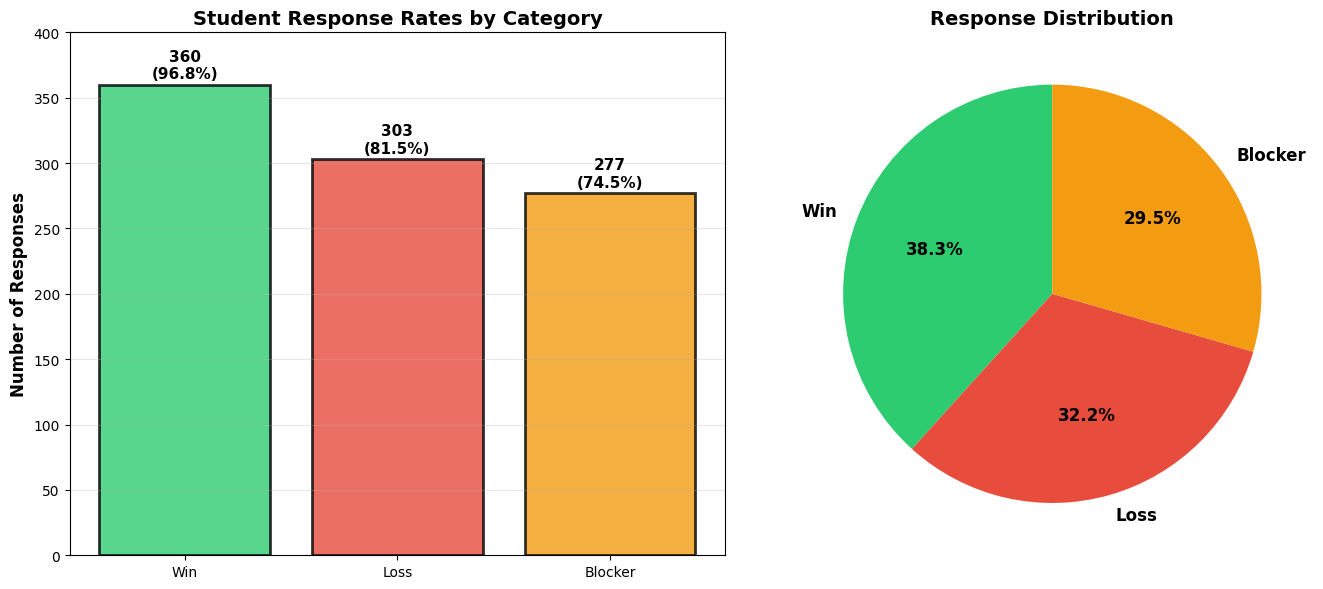

In [15]:
# Pie Chart 
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# LEFT: Response counts
categories = ['Win', 'Loss', 'Blocker']
responses = [
    df['Win'].notna().sum(),
    df['Loss'].notna().sum(),
    df['Blocker'].notna().sum()
]
colors = ['#2ecc71', '#e74c3c', '#f39c12']

ax1.bar(categories, responses, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylabel('Number of Responses', fontsize=12, fontweight='bold')
ax1.set_title('Student Response Rates by Category', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 400)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(responses):
    percentage = (v / len(df)) * 100
    ax1.text(i, v + 5, f'{v}\n({percentage:.1f}%)', ha='center', fontweight='bold', fontsize=11)

# RIGHT: Pie chart
ax2.pie(responses, labels=categories, colors=colors, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Response Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/charts/response_rates.png', dpi=300, bbox_inches='tight')
print(" Saved: ../reports/charts/response_rates.png")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18904\2867323599.py:47: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18904\2867323599.py:47: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18904\2867323599.py:48: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  plt.savefig('../reports/charts/top_themes_comparison.png', dpi=300, bbox_inches='tight')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18904\2867323599.py:48: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) DejaVu Sans.
  plt.savefig('../reports/charts/top_themes_comparison.png', dpi=300, bbox_inches='tight')


 Saved: ../reports/charts/top_themes_comparison.png


c:\Users\lenovo\umuzi-checkin-nlp\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\umuzi-checkin-nlp\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


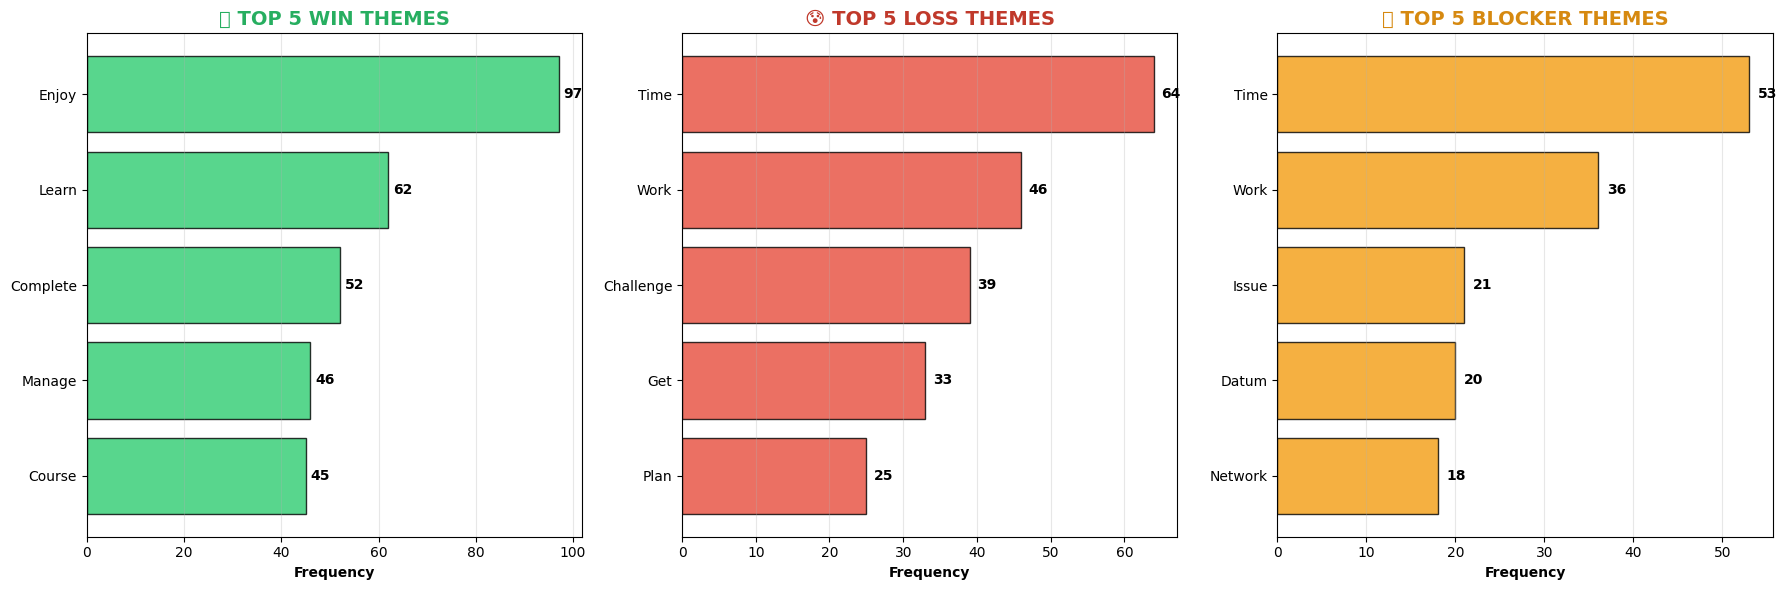

In [16]:
# Top 5 Themes Comparison Across Categories
import matplotlib.pyplot as plt
import pandas as pd

# Create comparison data
comparison_data = {
    'Wins': ['Enjoy', 'Learn', 'Complete', 'Manage', 'Course'],
    'Win_Count': [97, 62, 52, 46, 45],
    'Losses': ['Time', 'Work', 'Challenge', 'Get', 'Plan'],
    'Loss_Count': [64, 46, 39, 33, 25],
    'Blockers': ['Time', 'Work', 'Issue', 'Datum', 'Network'],
    'Blocker_Count': [53, 36, 21, 20, 18]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Win themes
axes[0].barh(comparison_data['Wins'], comparison_data['Win_Count'], 
             color='#2ecc71', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Frequency', fontweight='bold')
axes[0].set_title('🎉 TOP 5 WIN THEMES', fontsize=14, fontweight='bold', color='#27ae60')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(comparison_data['Win_Count']):
    axes[0].text(v + 1, i, str(v), va='center', fontweight='bold')

# Loss themes
axes[1].barh(comparison_data['Losses'], comparison_data['Loss_Count'], 
             color='#e74c3c', alpha=0.8, edgecolor='black')
axes[1].set_xlabel('Frequency', fontweight='bold')
axes[1].set_title('😰 TOP 5 LOSS THEMES', fontsize=14, fontweight='bold', color='#c0392b')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(comparison_data['Loss_Count']):
    axes[1].text(v + 1, i, str(v), va='center', fontweight='bold')

# Blocker themes
axes[2].barh(comparison_data['Blockers'], comparison_data['Blocker_Count'], 
             color='#f39c12', alpha=0.8, edgecolor='black')
axes[2].set_xlabel('Frequency', fontweight='bold')
axes[2].set_title('🚧 TOP 5 BLOCKER THEMES', fontsize=14, fontweight='bold', color='#d68910')
axes[2].invert_yaxis()
axes[2].grid(axis='x', alpha=0.3)
for i, v in enumerate(comparison_data['Blocker_Count']):
    axes[2].text(v + 1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/charts/top_themes_comparison.png', dpi=300, bbox_inches='tight')
print(" Saved: ../reports/charts/top_themes_comparison.png")
plt.show()

 Saved: ../reports/charts/infrastructure_breakdown.png


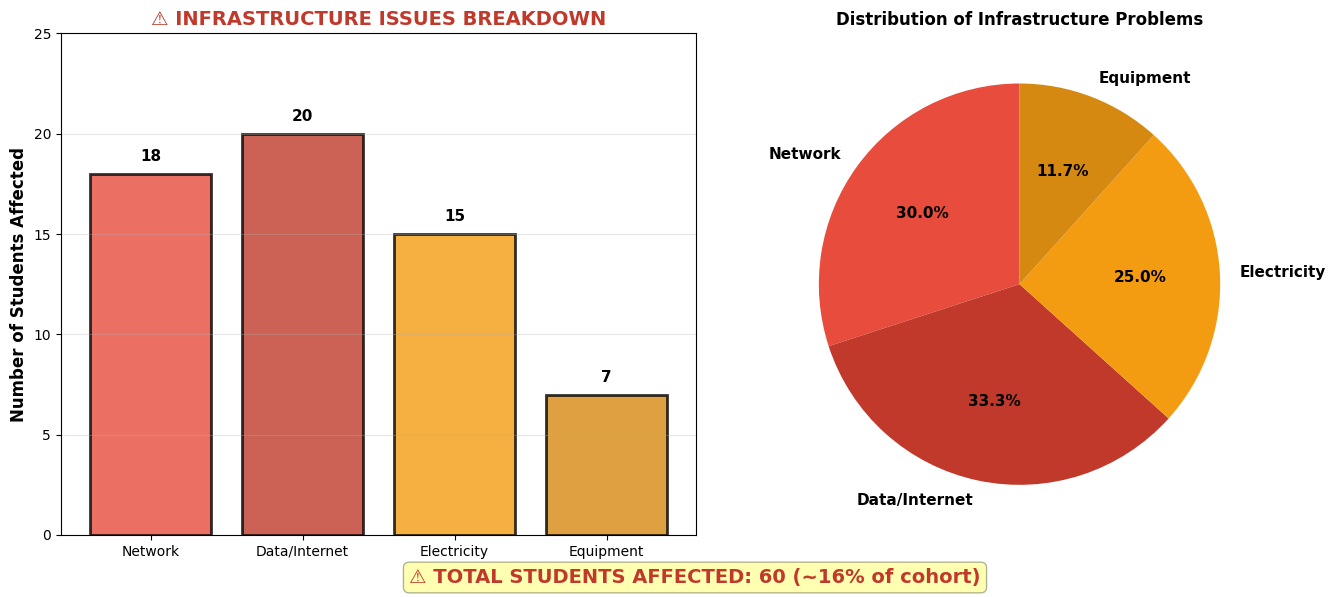

In [18]:
#  Infrastructure Issues Breakdown
import matplotlib.pyplot as plt

# Infrastructure issues data
infra_issues = {
    'Network': 18,
    'Data/Internet': 20,
    'Electricity': 15,  
    'Equipment': 7      
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# LEFT: Bar chart
colors_infra = ['#e74c3c', '#c0392b', '#f39c12', '#d68910']
bars = ax1.bar(infra_issues.keys(), infra_issues.values(), 
               color=colors_infra, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylabel('Number of Students Affected', fontsize=12, fontweight='bold')
ax1.set_title('⚠️ INFRASTRUCTURE ISSUES BREAKDOWN', fontsize=14, fontweight='bold', color='#c0392b')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, 25)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# RIGHT: Pie chart
ax2.pie(infra_issues.values(), labels=infra_issues.keys(), colors=colors_infra,
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Distribution of Infrastructure Problems', fontsize=12, fontweight='bold')

# Add total affected
total_affected = sum(infra_issues.values())
fig.text(0.5, 0.02, f'⚠️ TOTAL STUDENTS AFFECTED: {total_affected} (~16% of cohort)',
         ha='center', fontsize=14, fontweight='bold', color='#c0392b',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.savefig('../reports/charts/infrastructure_breakdown.png', dpi=300, bbox_inches='tight')
print(" Saved: ../reports/charts/infrastructure_breakdown.png")
plt.show()